# Yelp 1-5 Star Ratings Prediction From Text Reviews

## Project Description
This notebook demonstrates a step-by-step approach to building a machine learning model for classifying text reviews into star ratings, from 1 to 5, using various supervised learning algorithms. The labeled dataset consists of reviews sourced from Yelp (https://www.yelp.com/), with each review associated with a rating given by the user that reflects their satisfaction.

## Objective
The primary goal of this project is to train machine learning models that can accurately predict star ratings based on the text content of reviews. Once trained, these models can be applied to unlabeled reviews to infer likely star ratings.

## About Yelp

Yelp is a widely-used online platform where users can find, review, and rate local businesses across a variety of industries. From restaurants and cafes to hotels and retail stores, Yelp provides a comprehensive directory of businesses. Users share their experiences through star ratings (from 1 to 5) and detailed reviews, making Yelp a valued resource for customer feedback on service quality, product offerings, ambiance, etc. This dataset leverages these reviews, offering insights into customer satisfaction across diverse business categories.

## Possible Use Cases

The machine learning models developed in this project for Yelp review star rating prediction can be applied in various real-world scenarios. Some possible use cases include:

1. **Customer Sentiment Analysis**
   - Businesses can use the models to automatically analyze customer feedback and determine the general sentiment of reviews and their intensity. This can help companies identify areas for improvement and monitor customer satisfaction more efficiently.

2. **Automated Review Categorization**
   - The models can automatically categorize reviews by star ratings, enabling businesses to quickly filter and prioritize feedback based on customer satisfaction. This is particularly useful for companies handling large volumes of reviews across various channels, including social media posts, emails, WhatsApp messages, chat logs, review sites without a rating system, and YouTube videos (which can be transcribed and analyzed). These models help businesses make sense of feedback, even when no explicit user rating is provided.

3. **Real-time Feedback Monitoring**
   - The models can be integrated into a real-time feedback monitoring system. As customers submit reviews, messages or posts, the system can automatically predict the star rating and alert the business to low-rated reviews, allowing for faster responses to dissatisfied customers.

4. **Product and Service Improvement**
   - By analyzing trends in low-rated reviews (e.g., consistently 1-star reviews mentioning poor service or food quality), businesses can identify recurring issues and focus their efforts on improving specific areas like customer service, product quality, or delivery times.

5. **Review Summarization and Prioritization**
   - Companies can use the models to prioritize reviews based on their predicted star ratings. Higher-rated reviews can be highlighted for marketing and customer success teams, while lower-rated reviews can be flagged for follow-up actions or further analysis.

6. **Competitive Analysis**
   - The models can be applied to analyze reviews of competitors to understand their strengths and weaknesses. This information can be used to inform marketing strategies, product development, and customer engagement efforts.

7. **Market Research**
   - The predictive models can aid in market research by categorizing and analyzing large amounts of customer feedback, offering insights into customer preferences, product performance, and service satisfaction across different regions or demographics.

## Approach
1. **Data Exploration and Preprocessing**: Text reviews are converted into numerical representations using techniques such as TF-IDF and tokenization. This enables the algorithms to interpret and learn from the textual data.
2. **Model Training**: Several models, ranging from traditional machine learning classifiers to more advanced deep learning architectures, are trained on the labeled data to evaluate their performance on the review classification task. The models include:
- Logistic Regression (Multinomial)
- Support Vector Machine (SVM)
- Random Forest
- Gradient Boosting (XGBoost)
- Naive Bayes
- Neural Networks (Feedforward, LSTM, Transformers-based)

3. **Evaluation**: Each model is evaluated on key metrics (e.g. accuracy, F1 scores, etc) and suitability for the task. Performance insights help determine the most effective model for classifying reviews with different star ratings.

## Power BI Dashboard
To complement the analysis, a Power BI dashboard has been created to visualize each model's results and compare their performance across metrics. This dashboard is accessible [here](https://app.powerbi.com/view?r=eyJrIjoiMTVmNTMwOGEtYjIxMy00YjUyLWE4NTItYTg1OGE5MjkwYjgwIiwidCI6IjJmZmQxOWViLTU5ZWEtNGJlOS1hOTEwLThhNDE5ZDdjOTM1OSJ9) and is also included in this project's [GitHub repository]() as "yelp stars prediction results analysis.pbix".

## Models Explored
The notebook explores multiple algorithms, from simpler linear classifiers to more complex neural networks. This multi-algorithm approach allows us to compare performance, interpretability, and computational efficiency.

## Steps to be followed:

0. Import Libraries
1. Data Exploration and Preprocessing
2. Model Training
 - 2.1. Logistic Regression (Multinomial)
 - 2.2. Support Vector Machine (SVM)
 - 2.3. Random Forest
 - 2.4. Gradient Boosting (XGBoost)
 - 2.5. Naive Bayes
 - 2.6. Neural Networks - Feedforward Neural Network
 - 2.7. Neural Networks - Recurrent Neural Network (RNN) with LSTM
 - 2.8. Neural Networks - Transformers (Fine-Tune RoBERTa)
4. Consolidating Results
5. Power BI Dashboards
6. Next Steps


### 0\. Import Libraries

In [ ]:
!pip install transformers datasets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import joblib
import torch
from typing import List, Union, Optional, Dict, Tuple, Any
from xgboost import XGBClassifier
from datasets import Dataset
import spacy
from spacy import displacy
from nltk.corpus import stopwords
import nltk
from collections import Counter
import tqdm
from transformers import (RobertaTokenizer, RobertaForSequenceClassification,
                          Trainer, TrainingArguments)

from sklearn.model_selection import train_test_split
from sklearn.base import ClassifierMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Dense, Dropout, Embedding, LSTM,
                                     SpatialDropout1D, GlobalAveragePooling1D,
                                     BatchNormalization, TFSMLayer)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, History
from tensorflow.keras.regularizers import l2

### 1\. Data Exploration and Preprocessing

#### 1\.1 Data Exploration

In [ ]:
# Collect Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/yelp.csv')
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


No null values in any of the columns.

In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


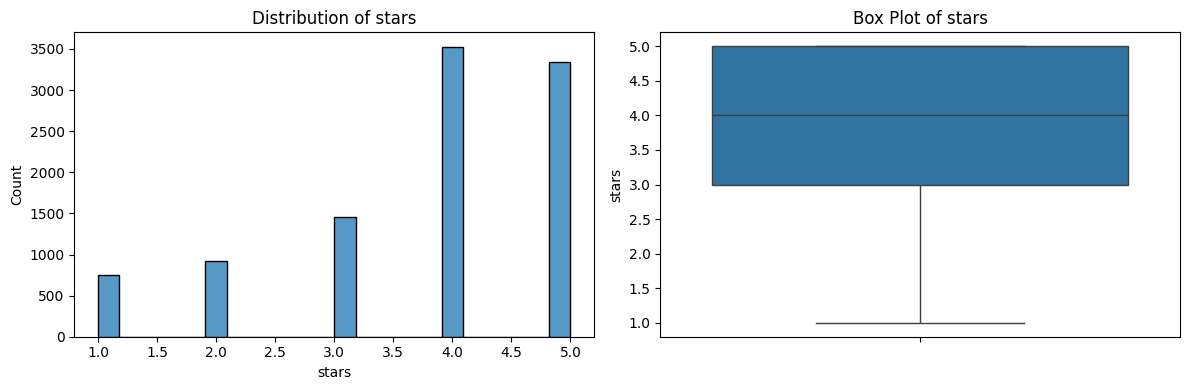


Cell execution took 0.7187 seconds.


In [ ]:
start_time = time.time()  # Start timing

def plot_distribution_and_boxplot(df: pd.DataFrame, column_name: str) -> None:
  """Plots the distribution and box plot of a numerical column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    """

  plt.figure(figsize=(12, 4))

  # Distribution plot
  plt.subplot(1, 2, 1)
  sns.histplot(df[column_name])
  plt.title(f"Distribution of {column_name}")

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")

  plt.tight_layout()
  plt.show()

plot_distribution_and_boxplot(df, "stars")

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

The dataset shows a class imbalance in the star ratings, which will be addressed later using class weights in the classifier models.

In [ ]:
# Find average number of words in reviews
avg_num_of_words = round(sum([len(i.split()) for i in df["text"]])/len(df["text"]))
print(f"Average number of words in reviews: {avg_num_of_words}")

Average number of words in reviews: 131


In [ ]:
df["num of words"] = df["text"].apply(lambda x: len(x.split()))
df["num of words"].describe()

,num of words
count,10000.000000
mean,131.039600
std,113.584114
min,1.000000
25%,54.000000
50%,101.000000
75%,173.000000
max,945.000000


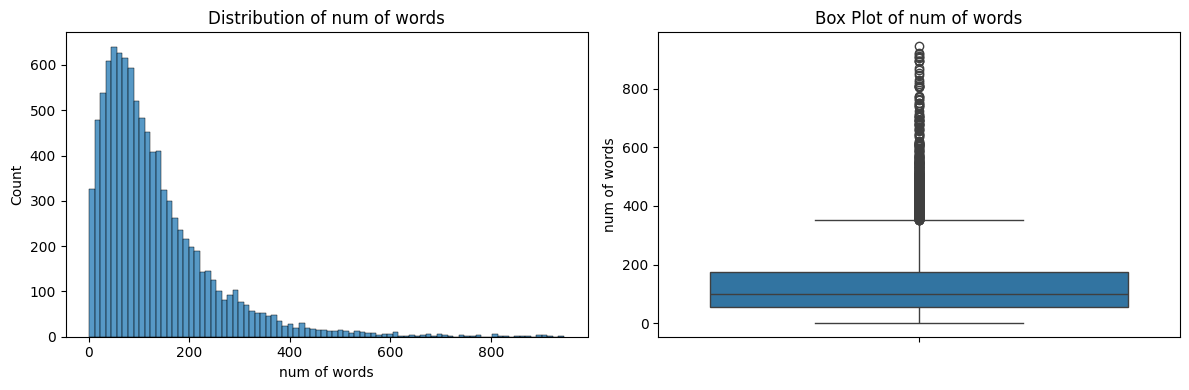

In [ ]:
plot_distribution_and_boxplot(df, "num of words")

In [ ]:
df["len of review"] = df["text"].apply(lambda x: len(x))
df["len of review"].describe()

,len of review
count,10000.000000
mean,710.738700
std,617.399827
min,1.000000
25%,294.000000
50%,541.500000
75%,930.000000
max,4997.000000


The average review length is 710 characters, though at least one review contains only a single character. Let's investigate this further.

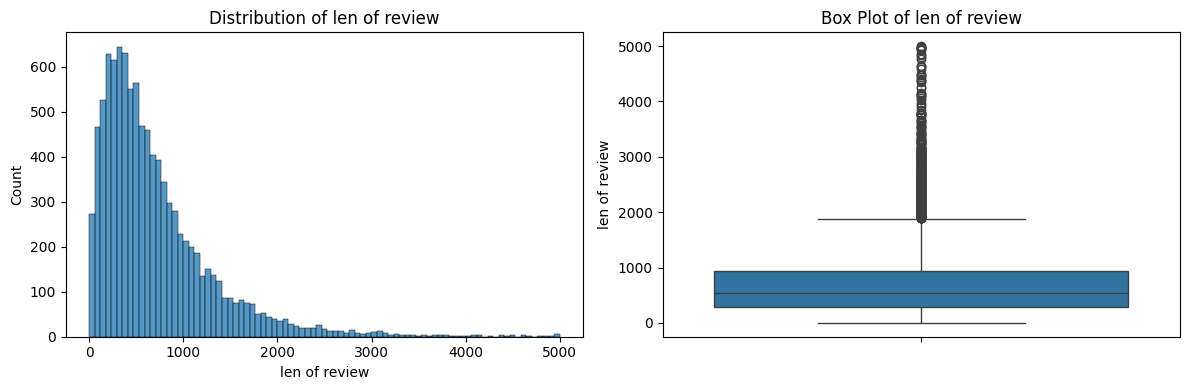

In [ ]:
plot_distribution_and_boxplot(df, "len of review")

In [ ]:
df[df["len of review"] < 10].describe()

,stars,cool,useful,funny,num of words,len of review
count,9.000000,9.0,9.000000,9.000000,9.000000,9.000000
mean,4.111111,0.0,0.222222,0.111111,1.222222,5.777778
std,1.166667,0.0,0.440959,0.333333,0.440959,2.905933
min,2.000000,0.0,0.000000,0.000000,1.000000,1.000000
25%,3.000000,0.0,0.000000,0.000000,1.000000,4.000000
50%,5.000000,0.0,0.000000,0.000000,1.000000,6.000000
75%,5.000000,0.0,0.000000,0.000000,1.000000,8.000000
max,5.000000,0.0,1.000000,1.000000,2.000000,9.000000


There are 9 reviews with fewer than 10 characters. Let's take a look at these reviews.

In [ ]:
df[df["len of review"] < 10]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,num of words,len of review
1290,QSCeI8HdUluG-YmbDWo-fw,2012-02-17,SjWAYNV79iT-j6NSUS1Rcw,2,No good,review,VRzQrrqpEonzull95pDCww,0,0,1,2,7
2733,WYj43z0qmlKklhcvV75mwQ,2013-01-02,5kmDKV6A3CZjLYvpYY7L6Q,5,Good food,review,_QrW0F17JNDfgao-bpz9Ng,0,0,0,2,9
2931,rRXGdtqUTBtczey1DGenEQ,2012-08-20,0zfkrAdu1SE3ZbTO3_bN_A,5,Super!,review,clWfsHVPgeSEusg-W6ybVg,0,0,0,1,6
4091,saiTvSpVRktGqgt1f4dQIw,2012-11-02,8u2AsQlHNgNqNICRjbSqkg,5,Intense!,review,bIZiqk9KkgrnVizFB5feLA,0,0,0,1,8
5105,TpQMR-JFE5V0UPzTjjuwFQ,2012-10-28,OzLuYcpWmm-5cq8RrCqReQ,5,Excellent,review,3p_muaP7a652QYtHUZNsFQ,0,0,0,1,9
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1,1
6708,KGX7O-_WqOIy9o7u9NOa9A,2011-04-19,EdFx6mNJDfJWP6yDO42cUQ,4,Go,review,vnSz2VT6s-gdRBjlFDACYg,0,0,0,1,2
7881,jj-K19oswZARMwCQK-b37A,2012-07-25,eAoV5Vuhh1GvDK8FbqNyHQ,3,Meh.,review,iq46mlqoLmNQzTR1z8oqUA,0,1,0,1,4
9688,cp39VURFby4A6u9m2It8jg,2012-08-09,Pa0j9chxMZpOhRb2A0R7DQ,5,Yummy!,review,I6KftQl6q4I7IuKV7wPR7w,0,1,0,1,6


One review contains only a single character ("X"), which should be filtered out during data cleaning as it lacks relevant text information. The other reviews should be kept.

In [ ]:
print(f"Unique Reviews: {len(df['text'].unique())} out of {len(df)}")
print(f"Duplicate Reviews: {len(df[df.duplicated(subset=['text'], keep=False)])} out of {len(df)}")

Unique Reviews: 9998 out of 10000
Duplicate Reviews: 4 out of 10000


There are two duplicate reviews in the text. Let's take a look at them.

In [ ]:
# View Duplicates
duplicate_texts = df[df.duplicated(subset=['text'], keep=False)]['text'].unique()
print("Duplicate texts in df['text'] column:")
duplicate_texts

Duplicate texts in df['text'] column:


array(['Great service',
       "This review is for the chain in general. The location we went to is new so it isn't in Yelp yet. Once it is I will put this review there as well. We were there on Friday at 5 PM. \n\nThe reason I gave it 2 stars is because the burger was very good and it was made the way I asked for it. My husbands burger was not.\n\nBut, the server and the fries left a lot to be desired. Let me preface by saying that we had been to several other locations. I like my fries crispy. I ask for them well done, extra crispy, scorched, tortured hollow tubes. Whatever their buzz word is for well done. The location will comply. EVERY OTHER 5 GUYS HAS COMPLIED. But not the one at TATUM AND SHEA. She said that corporate said they are not to cook the fries that way. So if we were to put up with soggy fries - yes soggy, then we did not want them. \n\nShe also interrupted us several times which is rude. THEN she went and called corporate just to double check for us and she came to th

In [ ]:
df[df.duplicated(subset=['text'], keep=False)]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,num of words,len of review
284,Hf_MFIPi7ZiIWDQodJMzwg,2012-10-25,9l7FzgtZobP81lMwEQy4AA,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,1,2,13
3921,kkBMTNET2xgHCW-cnNwKxA,2012-12-21,M_GC_TG9TpSzMAUQ_TAimw,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,0,2,13
4372,jvvh4Q00Hq2XyIcfmAAT2A,2012-06-16,ivGRamFF3KurE9bjkl6uMw,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0,346,1747
9680,rIonUa02zMz_ki8eF-Adug,2012-06-16,mutQE6UfjLIpJ8Wozpq5UA,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0,346,1747


In both cases, the duplicate reviews are from the same user and have the same star ratings. These should be removed during data cleaning.

Let's examine some of the named entities in the dataset to see if they could later be used as filters for specific products or companies.

In [ ]:
nlp = spacy.load('en_core_web_sm')

for index, review in enumerate(df["text"][:50]):
  print(f"\n\nReview Number {index + 1}")
  doc = nlp(review)
  displacy.render(doc, jupyter=True,style="ent")



Review Number 1




Review Number 2




Review Number 3




Review Number 4




Review Number 5




Review Number 6




Review Number 7




Review Number 8




Review Number 9




Review Number 10




Review Number 11


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)




Review Number 12




Review Number 13




Review Number 14




Review Number 15




Review Number 16




Review Number 17




Review Number 18




Review Number 19




Review Number 20




Review Number 21




Review Number 22




Review Number 23




Review Number 24




Review Number 25




Review Number 26




Review Number 27




Review Number 28




Review Number 29




Review Number 30




Review Number 31




Review Number 32




Review Number 33




Review Number 34




Review Number 35




Review Number 36




Review Number 37




Review Number 38




Review Number 39




Review Number 40




Review Number 41




Review Number 42




Review Number 43




Review Number 44




Review Number 45




Review Number 46




Review Number 47




Review Number 48




Review Number 49




Review Number 50


In [ ]:
start_time = time.time()  # Start timing

for index, review in enumerate(df["text"][:50]):
  print(f"Review Number {index + 1}")
  doc = nlp(review)
  for entry in doc.ents:
    print(f"Token is : {entry.text}, NER detected:  {entry.label_}, Explain : {spacy.explain(entry.label_)}")
  print("\n\n")

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

Review Number 1
Token is : Saturday, NER detected:  DATE, Explain : Absolute or relative dates or periods
Token is : morning, NER detected:  TIME, Explain : Times smaller than a day
Token is : Bloody Mary, NER detected:  PERSON, Explain : People, including fictional
Token is : 2, NER detected:  CARDINAL, Explain : Numerals that do not fall under another type



Review Number 2
Token is : about 5:50 PM, NER detected:  TIME, Explain : Times smaller than a day
Token is : this past Sunday, NER detected:  DATE, Explain : Absolute or relative dates or periods
Token is : Sunday, NER detected:  DATE, Explain : Absolute or relative dates or periods
Token is : evening, NER detected:  TIME, Explain : Times smaller than a day
Token is : 5:52, NER detected:  TIME, Explain : Times smaller than a day
Token is : Here's The Beef, NER detected:  WORK_OF_ART, Explain : Titles of books, songs, etc.
Token is : 11, NER detected:  CARDINAL, Explain : Numerals that do not fall under another type
Token is : 6:

In [ ]:
start_time = time.time()  # Start timing

nlp = spacy.load('en_core_web_sm')

org_named_entities = []
gpe_named_entities = []
person_named_entities = []
for review in tqdm.tqdm(df["text"], desc="applying NER to reviews"):
  doc = nlp(review)
  for ent in doc.ents:
    if ent.label_ == "ORG":
      org_named_entities.append(ent.text)
    if ent.label_ == "GPE":
      gpe_named_entities.append(ent.text)

# Count the frequency of each named entity label
org_entity_counts = Counter(org_named_entities)
gpe_entity_counts = Counter(gpe_named_entities)

# Get the most frequent named entities
org_most_frequent_entities = org_entity_counts.most_common(10)  # Get top 10
gpe_most_frequent_entities = gpe_entity_counts.most_common(10)  # Get top 10

print("\n\nMost frequent 'ORG' named entities (Companies, agencies, institutions, etc.):")
for index, (entity, count) in enumerate(org_most_frequent_entities):
  print(f"{index + 1}. {entity}: {count}")

print("\nMost frequent 'GPE' named entities (Countries, cities, states):")
for index, (entity, count) in enumerate(gpe_most_frequent_entities):
  print(f"{index + 1}. {entity}: {count}")

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
applying NER to reviews: 100%|██████████| 9997/9997 [05:29<00:00, 30.32it/s]



Most frequent 'ORG' named entities (Companies, agencies, institutions, etc.):
1. BBQ: 208
2. Yelp: 126
3. AZ: 121
4. Starbucks: 84
5. Mesa: 68
6. ASU: 65
7. taco: 64
8. WOW: 57
9. LOVE: 54
10. NY: 53

Most frequent 'GPE' named entities (Countries, cities, states):
1. Phoenix: 770
2. Scottsdale: 465
3. Arizona: 248
4. Tempe: 192
5. Chicago: 94
6. California: 66
7. Nice: 55
8. Texas: 48
9. New York: 48
10. salsa: 47

Cell execution took 331.6291 seconds.



Although the NER analysis yielded some interesting results, the identified named entities will not be used at this stage of the analysis. However, they could be incorporated later to identify specific products, locations, or other targets.

#### 1\.2 Data Preprocessing
- In this section, duplicates and the review with only 1 character will be removed, stop words will be removed from the reviews, words will be lemmatized, and then TF-IDF vectorization will be applied for non-neural network models.
- Class imbalance will be addressed using class weights in the classifier models.

##### 1.2.1 Remove Duplicates

In [ ]:
# Remove duplicate rows based on the 'text' column, keeping the first occurrence
df = df.drop_duplicates(subset=['text'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_id    9998 non-null   object
 1   date           9998 non-null   object
 2   review_id      9998 non-null   object
 3   stars          9998 non-null   int64 
 4   text           9998 non-null   object
 5   type           9998 non-null   object
 6   user_id        9998 non-null   object
 7   cool           9998 non-null   int64 
 8   useful         9998 non-null   int64 
 9   funny          9998 non-null   int64 
 10  num of words   9998 non-null   int64 
 11  len of review  9998 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 1015.4+ KB


##### 1.2.2 Remove Review with only 1 character

In [ ]:
# Remove review with length equal to 1
df = df[df['len of review'] > 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_id    9997 non-null   object
 1   date           9997 non-null   object
 2   review_id      9997 non-null   object
 3   stars          9997 non-null   int64 
 4   text           9997 non-null   object
 5   type           9997 non-null   object
 6   user_id        9997 non-null   object
 7   cool           9997 non-null   int64 
 8   useful         9997 non-null   int64 
 9   funny          9997 non-null   int64 
 10  num of words   9997 non-null   int64 
 11  len of review  9997 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 1015.3+ KB


##### 1.2.3 Remove Stop Words and Perform Lemmatization and TF-IDF Vectorization

In [ ]:
start_time = time.time()  # Start timing

# Split data
X_train, X_val, y_train, y_val = train_test_split(df["text"], df["stars"],
                                                  test_size=0.2, random_state=42)

# Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Stop Words Removal Function
def remove_stop_words(texts):
    return [' '.join([word for word in text.split() if word.lower() not in stop_words]) for text in texts]

X_train_no_stopwords = remove_stop_words(X_train)
X_val_no_stopwords = remove_stop_words(X_val)

# Lemmatization

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization
def lemmatize_texts(text_list):
    lemmatized_texts = []
    for text in tqdm.tqdm(text_list, desc="lemmatizing words"):
        doc = nlp(text)  # Process text with spaCy
        lemmatized_texts.append(" ".join([token.lemma_ for token in doc]))
    return lemmatized_texts

# Apply the lemmatization function
X_train_lemmatized = lemmatize_texts(X_train_no_stopwords)
X_val_lemmatized = lemmatize_texts(X_val_no_stopwords)

# Print the lemmatized output
for original, lemmatized in zip(X_train[:10], X_train_lemmatized[:10]):
    print(f"Original: {original}")
    print(f"Lemmatized: {lemmatized}\n")

# Initialize and fit TF-IDF vectorizer on the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_lemmatized)

# Transform validation data
X_val_tfidf = tfidf_vectorizer.transform(X_val_lemmatized)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
np.set_printoptions(threshold=np.inf)  # removes the truncation limit
print("\nFeature Names (Words):\n", feature_names)
print("\nShape of TF-IDF Matrix:", X_train_tfidf.shape)

# Display the TF-IDF matrix
np.set_printoptions(threshold=1000)  # resets the truncation limit
print("\nTF-IDF Matrix:\n", X_train_tfidf.toarray())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
lemmatizing words: 100%|██████████| 2000/2000 [00:34<00:00, 57.70it/s]


Original: Bevmo is very close to my house so I am here on a regular basis. I recentley found out Total Wine is opening and now Bevmo will price match their prices only. 

My boyfriend has asked for them to put the Fosters Premium Cans in the Fridge and they said it was a corporate decision. They still haven't put them in the fridge. 

The store is clean and the employees are helpful and friendly.
Lemmatized: Bevmo close house regular basis . recentley find Total Wine open bevmo price match price only . boyfriend ask put Fosters Premium Cans Fridge say corporate decision . still put fridge . store clean employee helpful friendly .

Original: I had a serious craving for Roti.  So glad I found this place.  A very small menu selection but it had exactly what I wanted.  The serving for $8.20 after tax is enough for 2 meals.  I know where to go from now on for a great meal with leftovers.  This is a noteworthy place to bring my Uncle T.J. who's a Trini when he comes to visit.
Lemmatized: ser

### 2\. Model Training

#### 2.0 Aux Functions for Model Training

In [ ]:
# Function to plot the classification results, such as the confusion matrix and the classification report
def plot_classification_results(y_true: List[int], y_pred: List[int], target_names: List[str]) -> None:
    """Plots the confusion matrix and classification report.

    Args:
        y_true (List[int]): True labels for the validation set.
        y_pred (List[int]): Predicted labels from the model.
        target_names (List[str]): Names of the target classes.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=target_names)

    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    class_report = classification_report(y_true, y_pred, target_names=target_names)
    print("Classification Report:")
    print(class_report)

In [ ]:
# Function to plot accuracy and loss over time for neural networks models and optionally save them on a specified folder
def plot_metrics(history: History, model_name: str, save_path: Optional[str] = None) -> None:
    """
    Plots accuracy and loss for both training and validation data.

    Args:
        history (History): Training history object.
        model_name (str): The name of the model, used for titles in the plot.
        save_path (Optional[str]): Path to save the plot. If None, the plot is not saved.
    """
    # Extract metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title(f'{model_name} Model - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{model_name} Model - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlapping

    if save_path:
        plt.savefig(save_path)

    plt.show()

    plt.close()  # Close the figure to free memory


In [ ]:
# Function to save model and experiment data
def save_experiment(
    model: Union[Model, ClassifierMixin],
    y_val: np.ndarray,
    y_val_pred: np.ndarray,
    model_name: str,
    comments: Optional[str]= None,
    history: Optional[History] = None,
) -> None:
    """
    Saves the trained model, confusion matrix, classification report, and metrics history in a new experiment folder.

   Args:
        model (Union[Model, ClassifierMixin]): The trained model to be saved (neural network or scikit-learn).
        y_val (np.ndarray): True labels for the validation set.
        y_val_pred (np.ndarray): Predicted labels for the validation set.
        model_name (str): The name of the model, used for saving files.
        comments (Optional[str]): Additional comments about the experiment. If provided, is saved as a text file.
        history (Optional[History]): Training history object containing accuracy and loss, only for neural network models.
    """

    base_dir = "/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments"

    # Find the latest experiment folder and increment
    experiment_folders = [f for f in os.listdir(base_dir) if f.startswith(f"{model_name} Experiment ")]
    experiment_numbers = [int(f.split("Experiment ")[1]) for f in experiment_folders if f.split("Experiment ")[1].isdigit()]
    next_experiment = max(experiment_numbers) + 1 if experiment_numbers else 1
    experiment_folder = f"{model_name} Experiment {next_experiment}"
    os.makedirs(os.path.join(base_dir, experiment_folder), exist_ok=True)
    final_dir = os.path.join(base_dir, experiment_folder)

    # Save the model
    if isinstance(model, Model):
        model.save(os.path.join(final_dir, f"{model_name}_{next_experiment}_model.keras"))
    else:
        joblib.dump(model, os.path.join(final_dir, f"{model_name}_{next_experiment}_model.joblib"))

    # Save the confusion matrix display
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.savefig(os.path.join(final_dir, f"{model_name}_{next_experiment}_confusion_matrix.png"))
    plt.close()

    # Save the classification report
    report = classification_report(y_val, y_val_pred)
    with open(os.path.join(final_dir, f"{model_name}_{next_experiment}_classification_report.txt"), "w") as f:
        f.write(report)

    # Save history plots (only for neural network models)
    if history:
        metrics_save_path = os.path.join(final_dir, f"{model_name}_{next_experiment}_history.png")
        plot_metrics(history, model_name, metrics_save_path)

     # Save history details (only for neural network models)
    if history:
        with open(os.path.join(final_dir, f"{model_name}_{next_experiment}_history.json"), "w") as f:
            json.dump(history.history, f)

    # Save comments as a text file if provided
    if comments:
        with open(os.path.join(final_dir, f"{model_name}_{next_experiment}_comments.txt"), "w") as f:
            f.write(comments)

    print(f"{model_name} model and experiment data saved in folder: {final_dir}")


 #### 2.1. Logistic Regression (Multinomial)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy: 0.4980


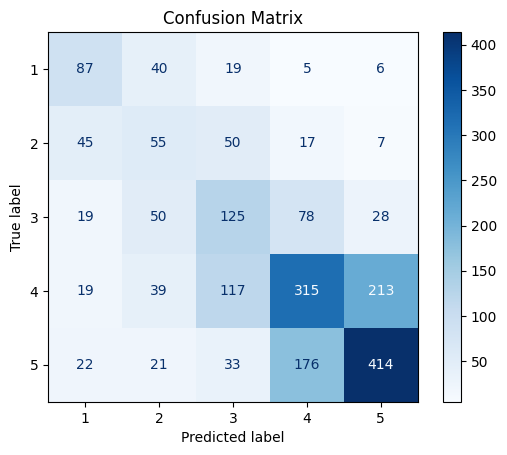

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.55      0.50       157
           2       0.27      0.32      0.29       174
           3       0.36      0.42      0.39       300
           4       0.53      0.45      0.49       703
           5       0.62      0.62      0.62       666

    accuracy                           0.50      2000
   macro avg       0.45      0.47      0.46      2000
weighted avg       0.51      0.50      0.50      2000

Logistic Regression (Multinomial) model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Logistic Regression (Multinomial) Experiment 22

Cell execution took 2.4600 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Create a Logistic Regression model (class_weight arg handles class imbalance)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

# Fit the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the validation data
predictions = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"\nAccuracy: {accuracy:.4f}")

# Plot Results
plot_classification_results(y_val, predictions, [str(i) for i in range(1, 6)])

# Save Experiment
comments = "max_features=5000 on tfidf, with lemmatization, nltk stop words removal and class imbalance handling with class_weight"
save_experiment(model, y_val, predictions, "Logistic Regression (Multinomial)", comments)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2.2. Support Vector Machine (SVM)


Accuracy: 0.4885


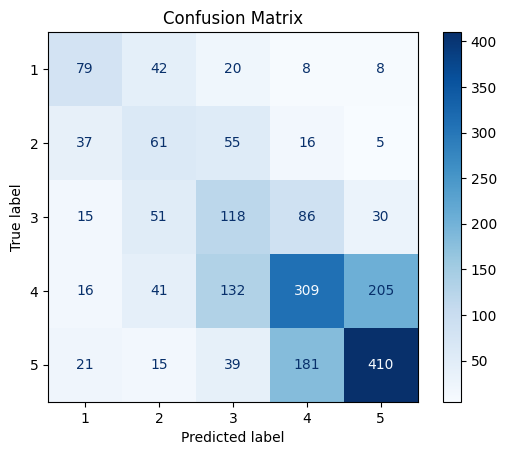

Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.50      0.49       157
           2       0.29      0.35      0.32       174
           3       0.32      0.39      0.36       300
           4       0.52      0.44      0.47       703
           5       0.62      0.62      0.62       666

    accuracy                           0.49      2000
   macro avg       0.44      0.46      0.45      2000
weighted avg       0.50      0.49      0.49      2000

Support Vector Machine (SVM) model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Support Vector Machine (SVM) Experiment 16

Cell execution took 47.6231 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Create the SVM classifier (class_weight arg handles class imbalance)
model = SVC(kernel='linear', C=1, decision_function_shape='ovo', class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Make predictions on the validation data
predictions = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val, predictions, [str(i) for i in range(1, 6)])

# Save Experiment
comments="with lemmatization, nltk stop words removal and class imbalance handling with class_weight, max_features=5000 on tfidf; kernel='linear', C=1, decision_function_shape='ovo'"
save_experiment(model, y_val, predictions, "Support Vector Machine (SVM)", comments)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2.3. Random Forest


Accuracy: 0.4720


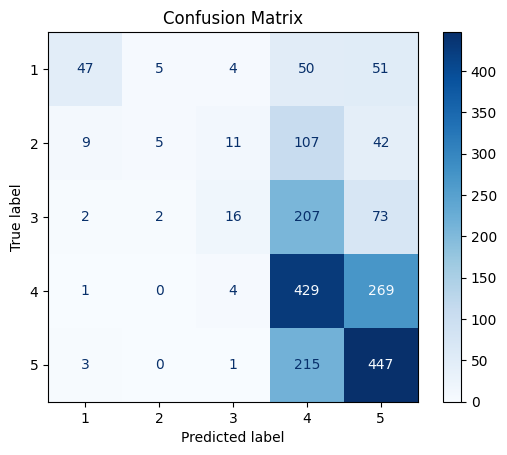

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.30      0.43       157
           2       0.42      0.03      0.05       174
           3       0.44      0.05      0.10       300
           4       0.43      0.61      0.50       703
           5       0.51      0.67      0.58       666

    accuracy                           0.47      2000
   macro avg       0.51      0.33      0.33      2000
weighted avg       0.48      0.47      0.42      2000

Random Forest model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Random Forest Experiment 15

Cell execution took 33.0643 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Create a Random Forest classifier (class_weight arg handles class imbalance)
model = RandomForestClassifier(n_estimators=200, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Make predictions on the validation data
predictions = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val, predictions, [str(i) for i in range(1, 6)])

# Save Experiment
comments = "n_estimators=200, max_features=5000 on tfidf, with lemmatization, nltk stop words removal and class imbalance handling with class_weight"
save_experiment(model, y_val, predictions, "Random Forest", comments)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2.4. Gradient Boosting (XGBoost)

<ipython-input-31-79ddb7a609bc>:7: RuntimeWarning: divide by zero encountered in divide
  scale_pos_weight = len(y_train) / (len(set(y_train)) * np.bincount(y_train))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy: 0.4865


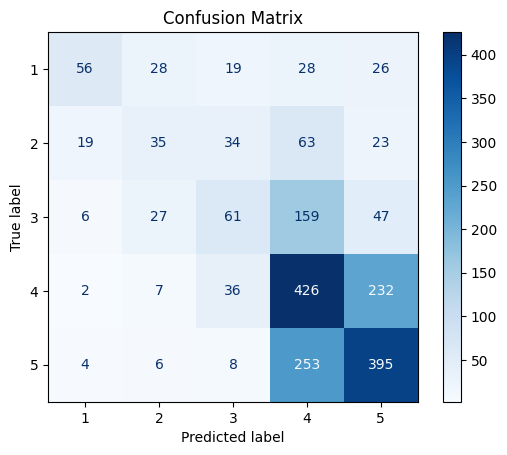

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.36      0.46       157
           2       0.34      0.20      0.25       174
           3       0.39      0.20      0.27       300
           4       0.46      0.61      0.52       703
           5       0.55      0.59      0.57       666

    accuracy                           0.49      2000
   macro avg       0.47      0.39      0.41      2000
weighted avg       0.48      0.49      0.47      2000

Gradient Boosting (XGBoost) model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Gradient Boosting (XGBoost) Experiment 13

Cell execution took 151.1459 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Adjusting the labels to be zero-indexed
y_train_adjusted = [label - 1 for label in y_train]  # Change labels from [1, 2, 3, 4, 5] to [0, 1, 2, 3, 4]

# Calculate scale_pos_weight for handling class imbalance
scale_pos_weight = len(y_train) / (len(set(y_train)) * np.bincount(y_train))

model = XGBClassifier(objective='multi:softmax', num_class=5, scale_pos_weight=scale_pos_weight)
model.fit(X_train_tfidf, y_train_adjusted)

# Adjust validation labels similarly
y_val_adjusted = [label - 1 for label in y_val]

# Make predictions on the validation data
predictions = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, predictions)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, predictions, [str(i) for i in range(1, 6)])

# Save Experiment
comments = "max_features=5000 on tfidf, with lemmatization, nltk stop words removal and class imbalance handling with class_weight"
save_experiment(model, y_val_adjusted, predictions, "Gradient Boosting (XGBoost)", comments)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2.5. Naive Bayes


Accuracy: 0.3945


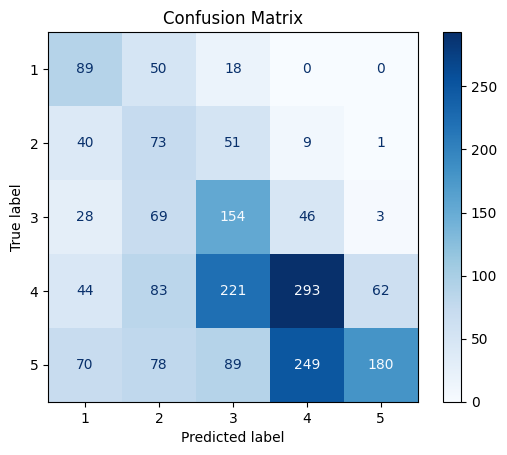

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.57      0.42       157
           2       0.21      0.42      0.28       174
           3       0.29      0.51      0.37       300
           4       0.49      0.42      0.45       703
           5       0.73      0.27      0.39       666

    accuracy                           0.39      2000
   macro avg       0.41      0.44      0.38      2000
weighted avg       0.50      0.39      0.40      2000

Naive Bayes model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Naive Bayes Experiment 12

Cell execution took 1.1151 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Handling class imbalance by determining weights
class_counts = np.bincount(y_train)[1:]

# Calculate sample weights inversely proportional to class frequencies
class_weights = 1.0 / class_counts

# Assign weights to each sample based on its class
sample_weights = class_weights[y_train - 1]

model = MultinomialNB()
model.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

# Make predictions on the validation data
predictions = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val, predictions, [str(i) for i in range(1, 6)])

# Save Experiment
comments = "only tf-idf, max_features=5000 on tfidf, with lemmatization, mltk stop words removal and class imbalance handling with class_weight"
save_experiment(model, y_val, predictions, "Naive Bayes", comments)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2.6. Neural Networks - Feedforward Neural Network

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2480 - loss: 1.6238 - val_accuracy: 0.3055 - val_loss: 1.5790
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2913 - loss: 1.5995 - val_accuracy: 0.2985 - val_loss: 1.5904
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3079 - loss: 1.5397 - val_accuracy: 0.3850 - val_loss: 1.4924
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3864 - loss: 1.4071 - val_accuracy: 0.4360 - val_loss: 1.3376
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4280 - loss: 1.2824 - val_accuracy: 0.4380 - val_loss: 1.2472
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4645 - loss: 1.1923 - val_accuracy: 0.4585 - val_loss: 1.2082
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4915 - loss: 1.1314 - val_accuracy: 0.4350 - val_loss: 1.2496
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5151 - loss: 1.0706 - val_accuracy: 0.4920 - va

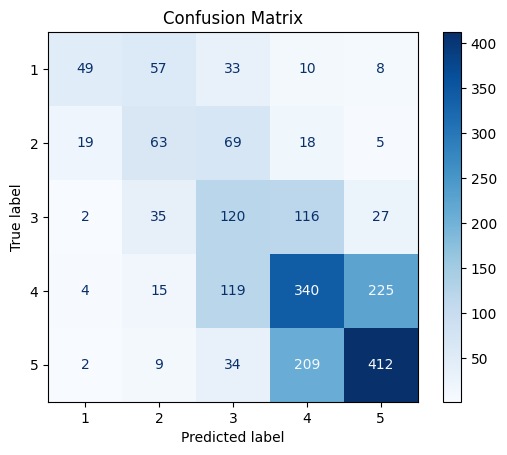

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.31      0.42       157
           2       0.35      0.36      0.36       174
           3       0.32      0.40      0.36       300
           4       0.49      0.48      0.49       703
           5       0.61      0.62      0.61       666

    accuracy                           0.49      2000
   macro avg       0.48      0.44      0.45      2000
weighted avg       0.50      0.49      0.49      2000



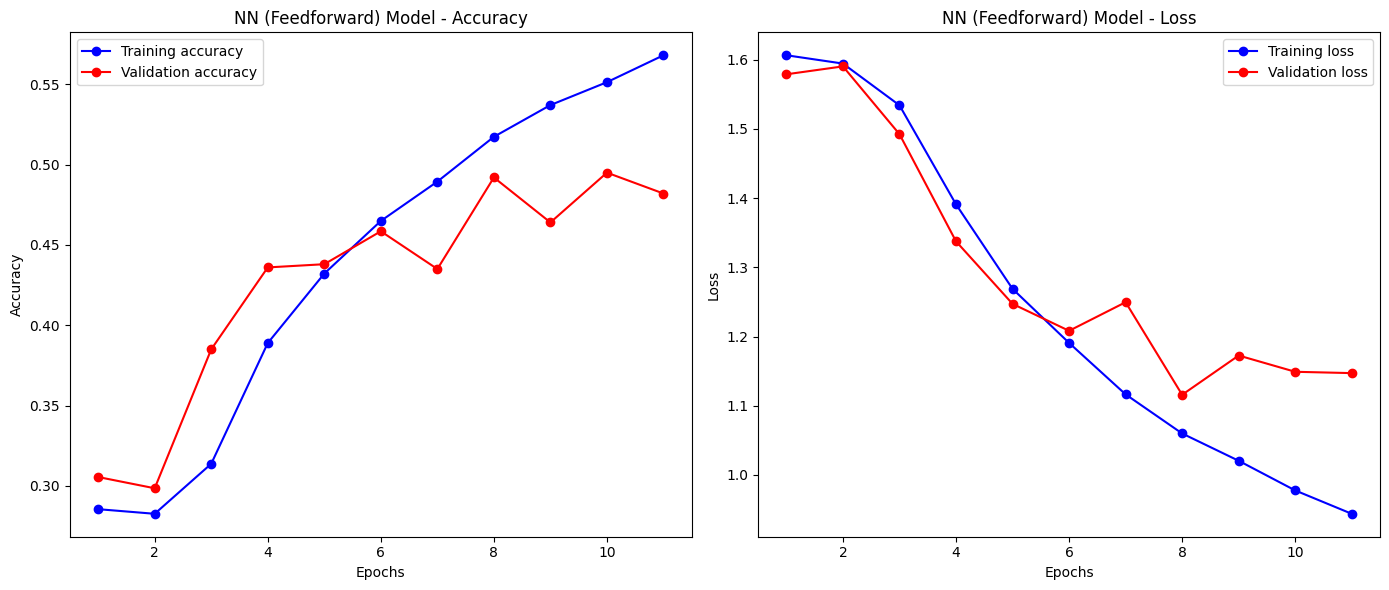

NN (Feedforward) model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/NN (Feedforward) Experiment 4

Cell execution took 32.5609 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Convert texts to sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=200)  # Pad sequences to maxlen

# Tokenization and padding for X_val
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert texts to sequences
X_val_padded = pad_sequences(X_val_seq, maxlen=200)  # Pad sequences to maxlen

# Adjusting the labels to be zero-indexed
y_train_adjusted = np.array([label - 1 for label in y_train])  # Change labels from [1, 2, 3, 4, 5] to [0, 1, 2, 3, 4]
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_adjusted), y=y_train_adjusted)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),  # Embedding Layer
    SpatialDropout1D(0.2),  # to improve regularization
    GlobalAveragePooling1D(),  # to reduce dimensionality
    Dense(256, activation='relu', input_shape=(200,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history: History = model.fit(X_train_padded, y_train_adjusted,
                             validation_data=(X_val_padded, y_val_adjusted),
                             epochs=15, batch_size=16,
                             class_weight=class_weights,
                             callbacks=[early_stopping])

# Make predictions on the validation data
y_val_pred_probs = model.predict(X_val_padded)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, y_val_pred)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, y_val_pred, [str(i) for i in range(1, 6)])

# Save Experiment
comments = """
Added Embedding (5000, 128, 200), SpatialDropout1D (0.2) and GlobalAveragePooling1D Layers,
and changed to 15 epochs while maintaining the early stopping

Code Snippets:

# Model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),  # Embedding Layer
    SpatialDropout1D(0.2),  # to improve regularization
    GlobalAveragePooling1D(),  # to reduce dimensionality
    Dense(256, activation='relu', input_shape=(200,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history: History = model.fit(X_train_balanced, y_train_balanced,
                             validation_data=(X_val_padded, y_val_adjusted),
                             epochs=15, batch_size=16,
                             callbacks=[early_stopping])
"""
save_experiment(model, y_val_adjusted, y_val_pred, "NN (Feedforward)", comments, history)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")


#### 2.7. Neural Networks - Recurrent Neural Network (RNN) with LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2709 - loss: 3.3075 - val_accuracy: 0.2800 - val_loss: 2.3144
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4394 - loss: 1.7986 - val_accuracy: 0.4500 - val_loss: 1.5972
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5548 - loss: 1.2806 - val_accuracy: 0.4350 - val_loss: 1.4423
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6125 - loss: 1.0500 - val_accuracy: 0.4585 - val_loss: 1.3250
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6654 - loss: 0.9097 - val_accuracy: 0.4390 - val_loss: 1.4521
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7081 - loss: 0.8102 - val_accuracy: 0.4580 - val_loss: 1.4302
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7516 - loss: 0.7168 - val_accuracy: 0.4085 - val_loss: 1.7118
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Accuracy: 0.4585


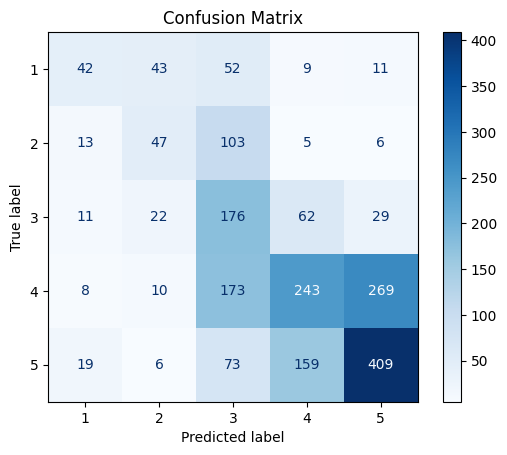

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.27      0.34       157
           2       0.37      0.27      0.31       174
           3       0.31      0.59      0.40       300
           4       0.51      0.35      0.41       703
           5       0.56      0.61      0.59       666

    accuracy                           0.46      2000
   macro avg       0.44      0.42      0.41      2000
weighted avg       0.48      0.46      0.45      2000



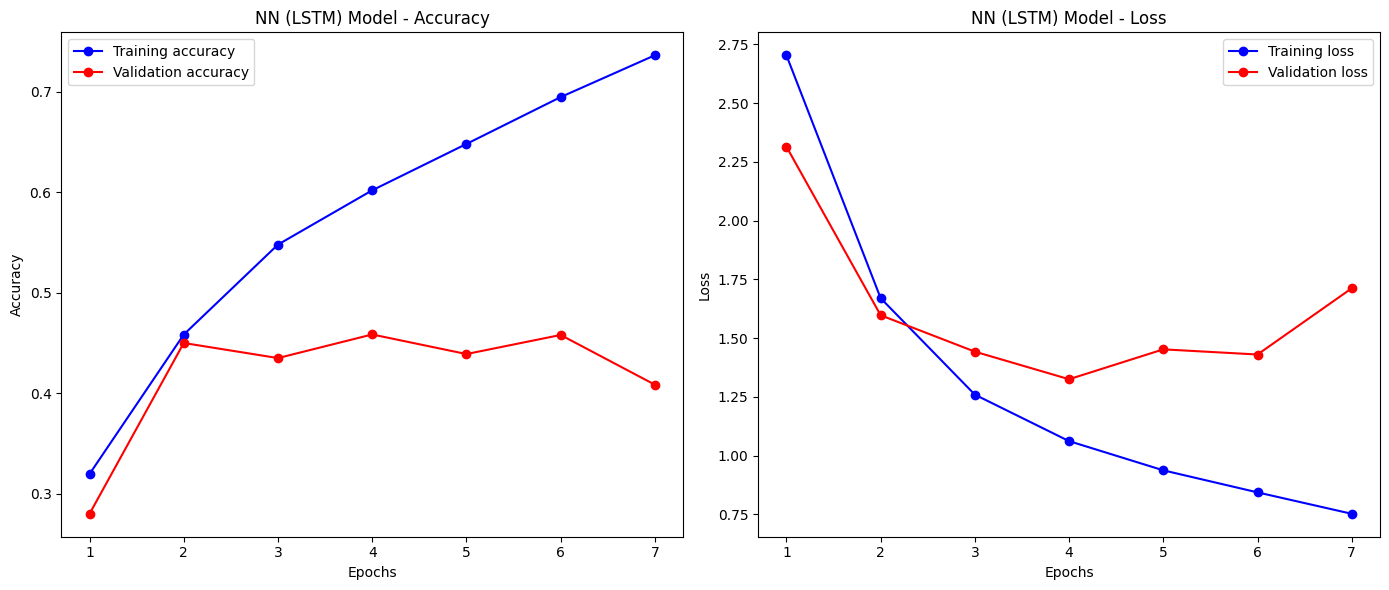

NN (LSTM) model and experiment data saved in folder: /content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/NN (LSTM) Experiment 4

Cell execution took 101.8168 seconds.


In [ ]:
start_time = time.time()  # Start timing

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Convert texts to sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=200)  # Pad sequences to maxlen

# Tokenization and padding for X_val
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert texts to sequences
X_val_padded = pad_sequences(X_val_seq, maxlen=200)  # Pad sequences to maxlen

# Adjusting the labels to be zero-indexed
y_train_adjusted = np.array([label - 1 for label in y_train])  # Change labels from [1, 2, 3, 4, 5] to [0, 1, 2, 3, 4]
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_adjusted), y=y_train_adjusted)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))  # For 5 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history: History = model.fit(
    X_train_padded, y_train_adjusted,
    validation_data=(X_val_padded, y_val_adjusted),
    epochs=10, batch_size=16,
    # class_weight=class_weights,
    callbacks=[early_stopping]
)

# Make predictions on the validation data
y_val_pred_probs = model.predict(X_val_padded)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, y_val_pred)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, y_val_pred, [str(i) for i in range(1, 6)])

# Save Experiment
comments = """Embedding (128 output dim), Spatial Dropout 1D (0.3), 2 LSTM Layers
with 64 and 32 units and L2 at 0.01, 2 Batch Normalization and 2 Dropout (0.3),
10 epochs with early stopping, without class weights"""
save_experiment(model, y_val_adjusted, y_val_pred, "NN (LSTM)", comments, history)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

#### 2\.8. Neural Networks - Transformers (Fine-Tune RoBERTa)

In [ ]:
# Adjusting the labels to be zero-indexed
y_train_adjusted = np.array([label - 1 for label in y_train])  # Change labels from [1, 2, 3, 4, 5] to [0, 1, 2, 3, 4]
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Convert to pandas DataFrames
train_df = pd.DataFrame({'Review': X_train, 'label': y_train_adjusted})
val_df = pd.DataFrame({'Review': X_val, 'label': y_val_adjusted})

# Convert pandas DataFrames to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['Review'], padding='max_length', truncation=True)

# Tokenize the datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)

# Load the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)  # Assuming 5-star ratings

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',              # Directory to save the model
    evaluation_strategy="epoch",         # Evaluation strategy
    learning_rate=2e-5,                  # Learning rate
    per_device_train_batch_size=8,       # Training batch size
    per_device_eval_batch_size=32,       # Evaluation batch size
    num_train_epochs=3,                  # Number of training epochs
    weight_decay=0.01,                   # Weight decay
    report_to='none',                    # Disable WandB logging
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,   # Use the tokenized training dataset
    eval_dataset=tokenized_val_dataset,      # Use the tokenized validation dataset
)

# Fine-tune the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Save the fine-tuned model
model.save_pretrained('./fine-tuned-roberta')
tokenizer.save_pretrained('./fine-tuned-roberta')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/7997 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.885600,0.867144
2,0.683700,0.916548
3,0.509700,0.999366


{'eval_loss': 0.9993661046028137, 'eval_runtime': 62.732, 'eval_samples_per_second': 31.882, 'eval_steps_per_second': 1.004, 'epoch': 3.0}


('./fine-tuned-roberta/tokenizer_config.json',
 './fine-tuned-roberta/special_tokens_map.json',
 './fine-tuned-roberta/vocab.json',
 './fine-tuned-roberta/merges.txt',
 './fine-tuned-roberta/added_tokens.json')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Accuracy: 0.6235


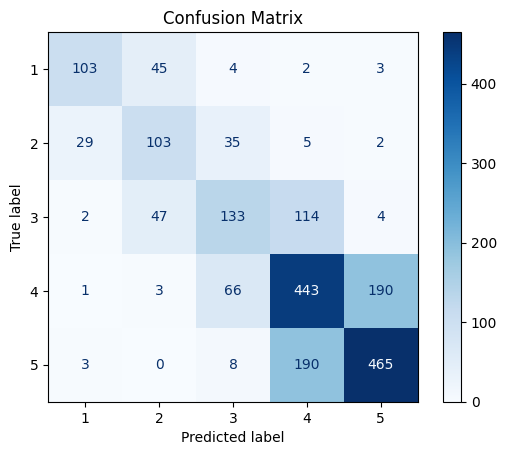

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.66      0.70       157
           2       0.52      0.59      0.55       174
           3       0.54      0.44      0.49       300
           4       0.59      0.63      0.61       703
           5       0.70      0.70      0.70       666

    accuracy                           0.62      2000
   macro avg       0.62      0.60      0.61      2000
weighted avg       0.62      0.62      0.62      2000



In [ ]:
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Specify the path to your fine-tuned model folder
model_path = './fine-tuned-roberta'

# Load the model and tokenizer from the saved folder
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Set model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predicted_ratings = []
for review in X_val.to_list():
    # Tokenize a single review
    tokenized_input = tokenizer(review, padding=True, truncation=True, return_tensors="pt")

    # Move the tokenized input to the device
    tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

    # Perform prediction
    with torch.no_grad():
        output = model(**tokenized_input)
        logits = output.logits
        predicted_label = torch.argmax(logits, dim=1)
        predicted_ratings.append(predicted_label.item())

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, predicted_ratings)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, predicted_ratings, [str(i) for i in range(1, 6)])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Accuracy: 0.6285


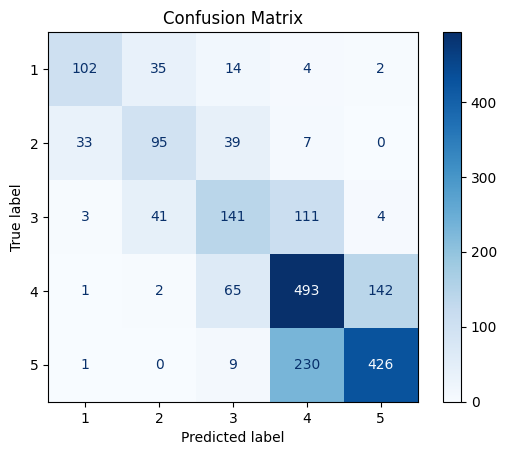

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.65      0.69       157
           2       0.55      0.55      0.55       174
           3       0.53      0.47      0.50       300
           4       0.58      0.70      0.64       703
           5       0.74      0.64      0.69       666

    accuracy                           0.63      2000
   macro avg       0.63      0.60      0.61      2000
weighted avg       0.64      0.63      0.63      2000



In [ ]:
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Specify the path to your fine-tuned model folder
model_path = './results/checkpoint-2500'

# Load the model and tokenizer from the saved folder
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Set model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predicted_ratings = []
for review in X_val.to_list():
    # Tokenize a single review
    tokenized_input = tokenizer(review, padding=True, truncation=True, return_tensors="pt")

    # Move the tokenized input to the device
    tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

    # Perform prediction
    with torch.no_grad():
        output = model(**tokenized_input)
        logits = output.logits
        predicted_label = torch.argmax(logits, dim=1)
        predicted_ratings.append(predicted_label.item())

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, predicted_ratings)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, predicted_ratings, [str(i) for i in range(1, 6)])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]


Accuracy: 0.6285


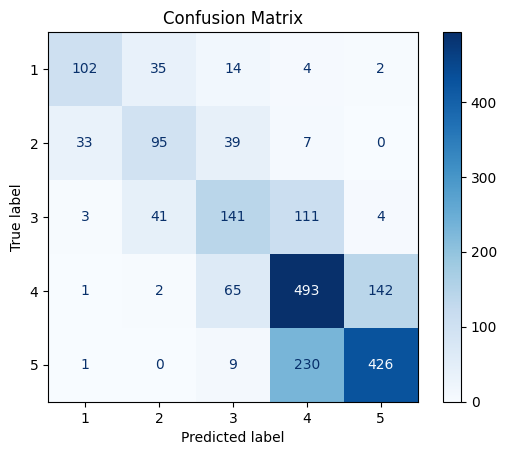

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.65      0.69       157
           2       0.55      0.55      0.55       174
           3       0.53      0.47      0.50       300
           4       0.58      0.70      0.64       703
           5       0.74      0.64      0.69       666

    accuracy                           0.63      2000
   macro avg       0.63      0.60      0.61      2000
weighted avg       0.64      0.63      0.63      2000



In [ ]:
y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Specify the path to your fine-tuned model folder
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/fine_tuned_roberta 2'

# Load the model and tokenizer from the saved folder
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Set model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predicted_ratings = []
for review in X_val.to_list():
    # Tokenize a single review
    tokenized_input = tokenizer(review, padding=True, truncation=True, return_tensors="pt")

    # Move the tokenized input to the device
    tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

    # Perform prediction
    with torch.no_grad():
        output = model(**tokenized_input)
        logits = output.logits
        predicted_label = torch.argmax(logits, dim=1)
        predicted_ratings.append(predicted_label.item())

# Evaluate the model
accuracy = accuracy_score(y_val_adjusted, predicted_ratings)
print(f"\nAccuracy: {accuracy:.4f}")

plot_classification_results(y_val_adjusted, predicted_ratings, [str(i) for i in range(1, 6)])

### 3\. Consolidating Results
- In this section, all model results will be consolidated into a single DataFrame and then exported as CSV and Excel files for further analysis in a Power BI dashboard.

#### 3\.0 Initializing DataFrame

In [ ]:
results_df = pd.DataFrame({'text_review': X_val, 'star_rating': y_val})

#### 3\.1 Logistic Regression (Multinomial)

In [ ]:
start_time = time.time()  # Start timing

# Load the saved model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Logistic Regression (Multinomial) Experiment 22/Logistic Regression (Multinomial)_22_model.joblib'
lr_model = joblib.load(model_path)

# should have the same features/format as the data used to train the model
predictions = lr_model.predict(X_val_tfidf)

# Consolidate results
results_df['lr_prediction'] = predictions
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction
4123,I've been to Bookman's a few times and have mi...,3,5
4066,These are simply the BEST sandwiches and salad...,5,1
1731,"Every friday, my dad and I eat here. We order ...",3,3
4741,Three stellar write-ups pushed me over the edg...,4,5
6392,Although a huge fan of bloody food. I have to ...,4,3



Cell execution took 0.0232 seconds.


#### 3\.2 Support Vector Machine (SVM)

In [ ]:
start_time = time.time()  # Start timing

# Load the saved SVM model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Support Vector Machine (SVM) Experiment 16/Support Vector Machine (SVM)_16_model.joblib'
svm_model = joblib.load(model_path)

# Should have the same features/format as the data used to train the model
predictions = svm_model.predict(X_val_tfidf)

# Save predictions
results_df['svm_prediction'] = predictions
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction,svm_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5
4066,These are simply the BEST sandwiches and salad...,5,1,3
1731,"Every friday, my dad and I eat here. We order ...",3,3,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5
6392,Although a huge fan of bloody food. I have to ...,4,3,5



Cell execution took 6.4695 seconds.


#### 3\.3 Random Forest

In [ ]:
start_time = time.time()  # Start timing

# Load the saved RF model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Random Forest Experiment 15/Random Forest_15_model.joblib'
rf_model = joblib.load(model_path)

# Should have the same features/format as the data used to train the model
predictions = rf_model.predict(X_val_tfidf)

# Save predictions
results_df['rf_prediction'] = predictions
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5
4066,These are simply the BEST sandwiches and salad...,5,1,3,4
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4



Cell execution took 0.6385 seconds.


#### 3.4 Gradient Boosting (XGBoost)

In [ ]:
start_time = time.time()  # Start timing

# Load the saved GB model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Gradient Boosting (XGBoost) Experiment 13/Gradient Boosting (XGBoost)_13_model.joblib'
gb_model = joblib.load(model_path)

# Should have the same features/format as the data used to train the model
predictions = gb_model.predict(X_val_tfidf)

predictions = predictions + 1  # Convert back to original class labels

# Save predictions
results_df['gb_prediction'] = predictions
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction,gb_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5,4
4066,These are simply the BEST sandwiches and salad...,5,1,3,4,4
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5,4
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4,4



Cell execution took 0.0915 seconds.


#### 3\.5 Naives Bayes

In [ ]:
start_time = time.time()  # Start timing

# Load the saved NB model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/Naive Bayes Experiment 12/Naive Bayes_12_model.joblib'
nb_model = joblib.load(model_path)

# Should have the same features/format as the data used to train the model
predictions = nb_model.predict(X_val_tfidf)

# Save predictions
results_df['nb_prediction'] = predictions
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction,gb_prediction,nb_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5,4,1
4066,These are simply the BEST sandwiches and salad...,5,1,3,4,4,1
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4,4,3
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5,4,1
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4,4,4



Cell execution took 0.0370 seconds.


#### 3.6 Neural Networks - FeedForward Neural Network

In [ ]:
start_time = time.time()  # Start timing

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Tokenization and padding for X_val
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert texts to sequences
X_val_padded = pad_sequences(X_val_seq, maxlen=200)  # Pad sequences to maxlen

# Load the model
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/NN (Feedforward) Experiment 4/NN (Feedforward)_4_model.keras'
nn_feedforward_model = load_model(model_path)

# Make predictions
predictions = nn_feedforward_model.predict(X_val_padded)

# Get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Convert back to original class labels
predicted_classes = predicted_classes + 1

# Save predictions
results_df['nn_feedforward_prediction'] = predicted_classes
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction,gb_prediction,nb_prediction,nn_feedforward_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5,4,1,3
4066,These are simply the BEST sandwiches and salad...,5,1,3,4,4,1,4
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4,4,3,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5,4,1,5
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4,4,4,4



Cell execution took 5.5976 seconds.


#### 3.7 Neural Networks - Recurrent Neural Network (RNN) with LSTM

In [ ]:
start_time = time.time()  # Start timing

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Tokenization and padding for X_val
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert texts to sequences
X_val_padded = pad_sequences(X_val_seq, maxlen=200)  # Pad sequences to maxlen

# Load the model from the .keras file
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/NN (LSTM) Experiment 4/NN (LSTM)_4_model.keras'
nn_lstm_model = load_model(model_path)

# Make predictions
predictions = nn_lstm_model.predict(X_val_padded)

# Get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Convert back to original class labels
predicted_classes = predicted_classes + 1

# Save predictions
results_df['nn_lstm_prediction'] = predicted_classes
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction,gb_prediction,nb_prediction,nn_feedforward_prediction,nn_lstm_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5,4,1,3,3
4066,These are simply the BEST sandwiches and salad...,5,1,3,4,4,1,4,3
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4,4,3,4,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5,4,1,5,5
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4,4,4,4,4



Cell execution took 6.8435 seconds.


#### 3\.8 Neural Networks - Transformers (Fine-Tuned RoBERTa)

In [ ]:
start_time = time.time()  # Start timing

y_val_adjusted = np.array([label - 1 for label in y_val])  # Same for validation labels

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Specify the path to your fine-tuned model folder
model_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Experiments/fine_tuned_roberta 2'

# Load the model and tokenizer from the saved folder
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Set model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predicted_ratings = []
for review in X_val.to_list():
    # Tokenize a single review
    tokenized_input = tokenizer(review, padding=True, truncation=True, return_tensors="pt")

    # Move the tokenized input to the device
    tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

    # Perform prediction
    with torch.no_grad():
        output = model(**tokenized_input)
        logits = output.logits
        predicted_label = torch.argmax(logits, dim=1)
        predicted_ratings.append(predicted_label.item())

y_pred = [x + 1 for x in predicted_ratings]

# Display the first few rows of the DataFrame
results_df['roberta_prediction'] = y_pred
display(results_df.head())

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")

,text_review,star_rating,lr_prediction,svm_prediction,rf_prediction,gb_prediction,nb_prediction,nn_feedforward_prediction,nn_lstm_prediction,roberta_prediction
4123,I've been to Bookman's a few times and have mi...,3,5,5,5,4,1,3,3,1
4066,These are simply the BEST sandwiches and salad...,5,1,3,4,4,1,4,3,4
1731,"Every friday, my dad and I eat here. We order ...",3,3,4,4,4,3,4,4,4
4741,Three stellar write-ups pushed me over the edg...,4,5,5,5,4,1,5,5,5
6392,Although a huge fan of bloody food. I have to ...,4,3,5,4,4,4,4,4,4



Cell execution took 42.6591 seconds.


#### 3\.9 Exporting DataFrame as CSV and Excel Files

In [ ]:
start_time = time.time()  # Start timing

# Path to save the results' files
save_path = '/content/drive/MyDrive/Colab Notebooks/yelp_stars_prediction/Results'

# Create directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the DataFrame as a CSV file
csv_filepath = os.path.join(save_path, 'results.csv')
results_df.to_csv(csv_filepath, index=False)

# Save the DataFrame as an Excel file
excel_filepath = os.path.join(save_path, 'results.xlsx')
results_df.to_excel(excel_filepath, index=False)

elapsed_time = time.time() - start_time
print(f"\nCell execution took {elapsed_time:.4f} seconds.")


Cell execution took 2.6636 seconds.


### 4\. Power BI Dashboard

To complement the analysis, a Power BI dashboard has been created to visualize each model's results and compare their performance across metrics. This dashboard is accessible [here](https://app.powerbi.com/view?r=eyJrIjoiMTVmNTMwOGEtYjIxMy00YjUyLWE4NTItYTg1OGE5MjkwYjgwIiwidCI6IjJmZmQxOWViLTU5ZWEtNGJlOS1hOTEwLThhNDE5ZDdjOTM1OSJ9) and is also included in the GitHub repository as "yelp stars prediction results analysis.pbix".

### 5\. Next Steps

This section outlines potential future enhancements to refine the model, improve interpretability, and add practical applications. These steps aim to increase the model's robustness, evaluate its performance on new data, and uncover insights into the driving factors behind extreme reviews.

1. **Assess Model Interpretability**
   - **Objective**: Understand how each model makes predictions and identify the key features influencing star ratings.
   - **Approach**:
     - Utilize interpretability tools such as SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to gain insights into model decisions.
     - Analyze feature importance scores to determine which words most significantly impact the predictions.
     - Create visualizations to illustrate the interpretability findings, enhancing transparency and trust in the models.

2. **Identify Key Drivers of Extreme Ratings (1-Star and 5-Star)**
   - **Objective**: Discover the primary reasons behind very high or very low ratings, helping to pinpoint customer satisfaction and dissatisfaction factors.
   - **Approach**:
     - Apply topic modeling techniques (e.g., LDA, NMF) to the text data, specifically isolating 1-star and 5-star reviews, to identify recurring themes (e.g., food quality, service, atmosphere).
     - Use keyword extraction and frequency analysis to highlight commonly mentioned aspects within these extreme ratings.
     - Visualize these themes in the Power BI dashboard to clearly present the aspects that most influence customer opinions, providing actionable insights.

3. **Test Models on New Data from Yelp's API**
   - **Objective**: Evaluate the models' generalizability and robustness on fresh, unseen data.
   - **Approach**:
     - Retrieve recent reviews from Yelp's API, ensuring the new data aligns with current consumer opinions.
     - Preprocess and transform this data in line with the existing dataset to maintain consistency.
     - Measure model performance on this new data to monitor any performance shifts and address potential data drift.

4. **Optimize Hyperparameters and Model Selection**
   - **Objective**: Achieve the best performance through fine-tuning and comparing additional model configurations.
   - **Approach**:
     - Conduct extensive hyperparameter tuning using methods like Grid Search or Random Search.
     - Explore automated machine learning (AutoML) tools to identify optimal model configurations.
     - Compare additional algorithms or ensemble methods to potentially enhance predictive accuracy.

5. **Deploy Models for Real-Time Predictions**
   - **Objective**: Make models available for practical, real-time applications.
   - **Approach**:
     - Develop a deployment pipeline using platforms such as Flask, FastAPI, or cloud services like AWS, GCP, or Azure.
     - Create a user-friendly interface or API endpoint that allows users to input new reviews and receive predicted star ratings instantly.
     - Implement monitoring and logging to track model performance and ensure reliability in a production environment.

6. **Integrate Sentiment Analysis and Additional Insights**
   - **Objective**: Provide a comprehensive analysis by incorporating sentiment scores along with star ratings.
   - **Approach**:
     - Implement sentiment analysis techniques to categorize reviews as positive, negative, or neutral.
     - Correlate sentiment scores with star ratings to uncover deeper patterns and insights.
     - Enhance the Power BI dashboard to display sentiment trends and their relationship with star ratings.

7. **Collaborate and Gather Feedback**
   - **Objective**: Refine models and methodologies based on community feedback and real-world applications.
   - **Approach**:
     - Share the project with peers to gather constructive feedback.
     - Incorporate user feedback to address any limitations or biases in the models.
     - Continuously iterate on the project by integrating new features, datasets, and methodologies based on feedback and evolving requirements.
